## Comparison with different mass distributions

In [26]:
from ler.rates import LeR
from ler.utils import get_param_from_json
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# initialize LeR
ler1 = LeR(
    npool=8,
    verbose=False,
    # GW related
    source_priors= {
        'source_frame_masses': 'binary_masses_BBH_popI_II_powerlaw_gaussian', 
        },      
    source_priors_params= {
        'source_frame_masses': {'mminbh': 4.59, 'mmaxbh': 86.22, 'alpha': 2.63, 'mu_g': 33.07, 'sigma_g': 5.69, 'lambda_peak': 0.10, 'delta_m': 4.82, 'beta': 1.26}, 
        },
)

/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
  effe_prime[select_window] = _np.exp(_np.nan_to_num((delta_m/mprime[select_window])+(delta_m/(mprime[select_window]-delta_m))))
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:162: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_prob(x)+_np.log(window)
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:160: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_prob(x)+_np.log(window)-_np.log(self.norm)


In [34]:
ler2 = LeR(
    npool=8,
    verbose=False,
)

/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
  effe_prime[select_window] = _np.exp(_np.nan_to_num((delta_m/mprime[select_window])+(delta_m/(mprime[select_window]-delta_m))))
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:162: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_prob(x)+_np.log(window)
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:160: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_prob(x)+_np.log(window)-_np.log(self.norm)


In [6]:
m1_w, m2_w = ler1.sample_source_frame_masses(size=10000)
m1_l, m2_l = ler2.sample_source_frame_masses(size=10000)

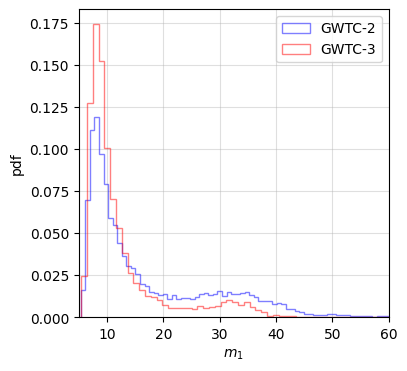

In [15]:
# plot
plt.figure(figsize=(4, 4))
plt.hist(m1_w, bins=100, alpha=0.5, label='GWTC-2', color='b', density=True, histtype='step')
plt.hist(m1_l, bins=100, alpha=0.5, label='GWTC-3', color='r', density=True, histtype='step')
plt.xlabel(r'$m_1$')
plt.ylabel('pdf')
plt.legend()
plt.xlim(5, 60)
plt.grid(alpha=0.4)
plt.show()

In [38]:
ler1.batch_size = 200000
ler1.unlensed_cbc_statistics(size=400000, resume=False, save_batch=False, output_jsonfile='unlensed_cbc_bbh_w.json');

unlensed params will be store in ./ler_data/unlensed_cbc_bbh_w.json
chosen batch size = 200000 with total size = 400000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
saving all unlensed_params in ./ler_data/unlensed_cbc_bbh_w.json 


In [39]:
ler1.lensed_cbc_statistics(size=400000, resume=False, save_batch=False, output_jsonfile='lensed_cbc_bbh_w.json');

lensed params will be store in ./ler_data/lensed_cbc_bbh_w.json
chosen batch size = 200000 with total size = 400000
There will be 2 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:52<00:00, 3803.32it/s]


Invalid sample found. Resampling 4 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.06it/s]


calculating snrs...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:53<00:00, 3752.01it/s]


Invalid sample found. Resampling 4 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.12it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_cbc_bbh_w.json 


In [40]:
ler1.rate_comparision_with_rate_calculation();

getting unlensed_params from json file ./ler_data/unlensed_cbc_bbh_w.json...
given detectability_condition == 'step_function'
total unlensed rate (yr^-1) (with step function): 847.5937159534756
number of simulated unlensed detectable events: 3275
number of all simulated unlensed events: 400000
storing detectable unlensed params in ./ler_data/unlensed_param_detectable.json
getting lensed_params from json file ./ler_data/lensed_cbc_bbh_w.json 
given detectability_condition == 'step_function'
total lensed rate (yr^-1) (with step function): 1.4480152910338109
number of simulated lensed detectable events: 2552
number of simulated all lensed events: 400000
storing detectable lensed params in ./ler_data/lensed_param_detectable.json
unlensed_rate (per year): 847.5937159534756
lensed_rate (per year): 1.4480152910338109
ratio: 585.3485948676245


In [41]:
ler2.batch_size = 200000
ler2.unlensed_cbc_statistics(size=400000, resume=False, save_batch=False, output_jsonfile='unlensed_cbc_bbh_l.json');

unlensed params will be store in ./ler_data/unlensed_cbc_bbh_l.json
chosen batch size = 200000 with total size = 400000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
saving all unlensed_params in ./ler_data/unlensed_cbc_bbh_l.json 


In [42]:
ler2.lensed_cbc_statistics(size=400000, resume=False, save_batch=False, output_jsonfile='lensed_cbc_bbh_l.json');

lensed params will be store in ./ler_data/lensed_cbc_bbh_l.json
chosen batch size = 200000 with total size = 400000
There will be 2 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:51<00:00, 3852.12it/s]


Invalid sample found. Resampling 3 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.14s/it]


calculating snrs...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:49<00:00, 4020.18it/s]


Invalid sample found. Resampling 2 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.66s/it]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_cbc_bbh_l.json 


In [44]:
ler2.rate_comparision_with_rate_calculation();

getting unlensed_params from json file ./ler_data/unlensed_cbc_bbh_l.json...
given detectability_condition == 'step_function'
total unlensed rate (yr^-1) (with step function): 441.2663467788323
number of simulated unlensed detectable events: 1705
number of all simulated unlensed events: 400000
storing detectable unlensed params in ./ler_data/unlensed_param_detectable.json
getting lensed_params from json file ./ler_data/lensed_cbc_bbh_l.json 
given detectability_condition == 'step_function'
total lensed rate (yr^-1) (with step function): 1.0916855093844249
number of simulated lensed detectable events: 1924
number of simulated all lensed events: 400000
storing detectable lensed params in ./ler_data/lensed_param_detectable.json
unlensed_rate (per year): 441.2663467788323
lensed_rate (per year): 1.0916855093844249
ratio: 404.2064706232583
